In [ ]:
28 * 28

784

The MNIST dataset is a grayscale image format, wich mean it only has 1 channel for 1 image.

The MNIST dataset only has a value for either it's white or black

In [ ]:
2454 * 1227

3011058

In order to have a colored images, you need to have 3 channel, and each channel represent a color (Red, Green Blue)

3011058 is only for 1 channel, for example :

*   Red channel has 3011058
*   Blue channel has 3011058
*   Green channel has 3011058



In [ ]:
3011058 * 3

9033174

The problem become the large amount of dataset can caused a


*   expensive computational calculation
*   If we're using a simple neural network, there's going to be a lot important data get lost, and there's a lot of less important data get calculated



The Goal: Hightlight the important data, and ignore the less important data

# Let's create the filters

In [ ]:
# import dependencies
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

we get 2 value from image.shape --> widht and height

In [ ]:
def convolve(image_path, filter_type, title=''):

  # read image in grayscale format
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  # define filter size
  filter_size = filter_type.shape[0]

  # create an array to store the convolution (x-m+1, y-m+1)
  filter = np.zeros(((image.shape[0] - filter_size) + 1,
                    (image.shape[1] - filter_size) + 1))

  # performing convolution

  for i in range(image.shape[0]):     # calculate for the height
    for j in range(image.shape[1]):   # calculate for the width
      try:
        filter[i,j] = (image[i:(i+filter_size),
                             j:(j+filter_size)] * filter_type).sum()    # i = 1, filter_size 3

      except Exception:
        pass

  # convert to tensor
  filter = torch.tensor(filter)

  # apllying an activation
  filter = F.relu(filter)


  # producing plot for the real image and filtered image
  figure, axes = plt.subplots(1, 2, dpi=120)
  plt.suptitle(title)
  axes[0].imshow(image, cmap='gray')
  axes[0].axis('off')
  axes[0].set_title('original')
  axes[1].imshow(filter, cmap='gray')
  axes[1].axis('off')
  axes[1].set_title("filtered")
  pass

In [ ]:
def convolve(image_filepath, filter, title=''):

    #  reading image in grayscale format
    image = cv2.imread(image_filepath, cv2.IMREAD_GRAYSCALE)

    #  defining filter size
    filter_size = filter.shape[0]

    #  creating an array to store convolutions (x-m+1, y-n+1)
    convolved = np.zeros(((image.shape[0] - filter_size) + 1,
                      (image.shape[1] - filter_size) + 1))

    #  performing convolution
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        try:
          convolved[i,j] = (image[i:(i+filter_size),
                                  j:(j+filter_size)] * filter).sum()
        except Exception:
          pass

    #  converting to tensor
    convolved = torch.tensor(convolved)
    #  applying relu activation
    convolved = F.relu(convolved)

    #  producing plots
    figure, axes = plt.subplots(1,2, dpi=120)
    plt.suptitle(title)
    axes[0].imshow(image, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('original')
    axes[1].imshow(convolved, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('convolved')
    pass

In [ ]:
# Write the filters

Sobel_horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])


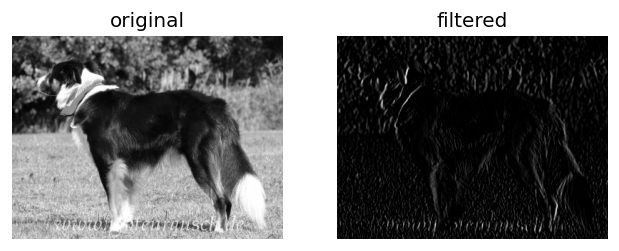

In [ ]:
# Test the filter

image = "/content/drive/MyDrive/Datasets/archive/images/000018.jpg"

convolve(image, Sobel_horizontal)